Fuente: 
- https://www.kaggle.com/scratchpad/notebook4031fa4176/edit
- https://www.kaggle.com/srikarkashyap/analyzing-healthcare-data-tutorial

#### Falta:
- ~~Pasar las fechas a formato correcto~~
- Filtrar las fechas a un rango menor, para que los graficos agregados no demoren tanto
- Calcular media móvil - Graficar
- Procesar N/A: Insertar NAs random en alguna columna y asignarle valor según algún criterio.
- ~~Shape~~
- Agrupar datos, sumar, contar, medias, etc. GROUPBY


# Analizando datos de programas de salud (EDA)

## Introducción

NTR Vaidya Seva (o Arogya Seva) es el programa de salud insignia del gobierno de Anhra Pradesh (India), con el cual las personas de bajos ingresos de ese estado pueden obtener salud pública de forma gratuita para muchas enfermedades y dolencias importantes

## A meter código!

Comenzamos importando las librerias necesarias:
* *Pandas* para cargar datos y explorar los datos
* *Matplotlib, Seaborn* para su visualización.

In [1]:
# Importamos las librerias 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.Series.__unicode__ = pd.Series.to_string

Vamos a leer el archivo de datos usando la función *read_csv* de Pandas. *read_csv* puede leer de manera sencilla archivos de valores separados por comas (csv).

No existen restricciones para nombrar las variables. *df*, *data* son los términos genéricos más comunes. Arrancamos con *data*.

In [2]:
# Leemos el dataset
data = pd.read_csv('data/ntrarogyaseva.csv')

Explotamos los datos con la función *head()* que por defecto, muestra los primeros 5 datos.

In [3]:
# Mostramos top5 de datos
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


Ahora vamos a mostrar algunas estadisticas simples de las columnas numéricas del dataset. Utilizamos la función *describe* de los datos para obtenerlas..

In [4]:
# Estadísticas descriptivas
# data.describe(include='all') # Incluye todas las variables
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.000000,479688.000000,479688.000000,479688.000000
mean,239844.500000,44.912264,30428.941698,27652.205861
std,138474.142301,18.961084,27441.592281,25951.706037
min,1.000000,0.000000,5.000000,2.000000
25%,119922.750000,34.000000,12500.000000,12500.000000
50%,239844.500000,47.000000,25000.000000,23200.000000
75%,359766.250000,59.000000,35000.000000,30600.000000
max,479688.000000,107.000000,520000.000000,520000.000000


Ahora analizamos los nombres de las columnas

In [5]:
# Muestra los nombres de las columnas en el dataset _data_
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

### Tamaño del dataframe

In [7]:
data.shape

(479688, 24)

### Corrección de formatos 

Las columnas PREAUTH_DATE, CLAIM_DATE, SURGERY_DATE, DISCHARGE_DATE y MORTALITY_DATE son cargadas como si fueran del tipo Object, cuando en realidad deberían ser levantadas como fechas

In [7]:
# data = pd.read_csv("input/ntrarogyaseva.csv")
from datetime import datetime

In [17]:
# Convertimos el campo DISCHARGE_DATE a fecha. Tira un error
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

In [16]:
# Buscamos el error:
# Alternativa I:
data.loc[data['DISCHARGE_DATE'].str.contains('116', na=False)]

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION


In [15]:
# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00']

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION


In [18]:
# Reemplazamos los datos erroneos:
# Alternativa I
mappings = {'30/04/0116 00:00:00':'30/04/2016 00:00:00'}
data['DISCHARGE_DATE'] = data['DISCHARGE_DATE'].replace(mappings)

# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00', 'DISCHARGE_DATE'] = '30/04/2016 00:00:00'

In [19]:
# Convertimos el campo DISCHARGE_DATE a fecha nuevamente
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

In [20]:
data['PREAUTH_DATE'] = pd.to_datetime(data['PREAUTH_DATE'])
data['CLAIM_DATE'] = pd.to_datetime(data['CLAIM_DATE'])
data['MORTALITY_DATE'] = pd.to_datetime(data['MORTALITY_DATE'])
data['SURGERY_DATE'] = pd.to_datetime(data['SURGERY_DATE'])

In [ ]:
# Borramos la columna que tiene el índice del CSV 
data = data.drop('   ', axis = 1)

### NAN Values 

In [23]:
data.isnull().sum()

AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
VILLAGE                  0
MANDAL_NAME              0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_LOCATION            0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469566
SRC_REGISTRATION         0
dtype: int64

In [418]:
# DISCHARGE_DATE tiene NAs porque pueden referirse a los pacientes que siguen internados o no tienen el alta
data.loc[data['DISCHARGE_DATE'].isna()]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
7,73,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Bhoghapuram,Vizianagaram,...,5000,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-05-05,NaT,YES,2014-05-23,D
10,52,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Rajam,Butchayyapeta,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-06-27,NaT,YES,2014-07-16,P
86,40,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dakamarri,Bheemunipatnam,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2015-02-23,NaT,YES,2015-10-03,D
97,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-08-04,NaT,YES,2015-03-05,P
122,58,Female,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Mudunuruu,Vuyyuru,Krishna,...,11250,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-06-15,NaT,YES,2015-08-23,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479300,69,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Badvel (P) (U),Badvel,YSR Kadapa,...,1028,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479305,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Garividi (Urban),Garividi,Vizianagaram,...,5140,Tirumala Multi Speciality Hospitals (India )Pv...,C,VIZIANAGARAM,Vizianagaram,2017-12-11,NaT,YES,2017-11-26,D
479372,67,Female,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ambapuram,Nellore,Nellore,...,10000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479403,0,Male(Child),Minorities,M4,PEDIATRICS,M4.1.14,Medical Management of Term Baby With Severe Pe...,Guntur (U),Guntur,Guntur,...,40000,MOTHER THERESA MULTI SPECIALITY,C,NARSARAOPET,Guntur,2017-11-11,NaT,YES,2017-11-17,D


In [419]:
# Podemos chequear si hay pacientes con DISCHARGE_DATE NA y que hallan fallecido
data.loc[(data['Mortality Y / N']=='YES') & (data['DISCHARGE_DATE'].isna())]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
7,73,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Bhoghapuram,Vizianagaram,...,5000,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-05-05,NaT,YES,2014-05-23,D
10,52,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Rajam,Butchayyapeta,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-06-27,NaT,YES,2014-07-16,P
86,40,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dakamarri,Bheemunipatnam,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2015-02-23,NaT,YES,2015-10-03,D
97,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-08-04,NaT,YES,2015-03-05,P
122,58,Female,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Mudunuruu,Vuyyuru,Krishna,...,11250,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-06-15,NaT,YES,2015-08-23,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479300,69,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Badvel (P) (U),Badvel,YSR Kadapa,...,1028,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479305,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Garividi (Urban),Garividi,Vizianagaram,...,5140,Tirumala Multi Speciality Hospitals (India )Pv...,C,VIZIANAGARAM,Vizianagaram,2017-12-11,NaT,YES,2017-11-26,D
479372,67,Female,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ambapuram,Nellore,Nellore,...,10000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479403,0,Male(Child),Minorities,M4,PEDIATRICS,M4.1.14,Medical Management of Term Baby With Severe Pe...,Guntur (U),Guntur,Guntur,...,40000,MOTHER THERESA MULTI SPECIALITY,C,NARSARAOPET,Guntur,2017-11-11,NaT,YES,2017-11-17,D


In [24]:
# Los MORTALITY_DATE en blanco, es porque no falleció o por error en la base
data.loc[(data['Mortality Y / N']=='NO') & (data['MORTALITY_DATE'].isna())]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-06-08,2013-07-09,NO,NaT,D
1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-08,2013-09-09,NO,NaT,D
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-15,2013-10-18,NO,NaT,D
3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-24,2013-09-27,NO,NaT,D
4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-31,2013-02-10,NO,NaT,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479683,22,Female,BC,S4,GYNAECOLOGY AND OBSTETRICS SURGERY,S4.2.2,Laparoscopic Cystectomy,Kalayakagollu,Butchireddipalem,Nellore,...,24910,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-11-15,2017-11-19,NO,NaT,D
479684,60,Male,BC,S12,MEDICAL ONCOLOGY,S12.16.2.2,Chemotherapy for Non Hodgkin Lymphoma with R ...,Rajupalem,Kothapatnam,Prakasam,...,45910,Manipal Health Enterprises PVT LTD,C,GUNTUR,Guntur,2017-11-17,2017-11-18,NO,NaT,D
479685,38,Male,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Yeturu,Chejerla,Nellore,...,30000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-11-16,2017-11-18,NO,NaT,D
479686,59,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Ganapavaram,Ganapavaram,West Godavari,...,23020,Sankar Eye Hospital,C,GUNTUR,Guntur,2017-11-16,2017-11-18,NO,NaT,D


## Analizando un poco mas profundo...

### Cual es la distribución de la variable SEX?

*value_counts()* es una función de Pandas que puede ser usada para obtener la distribución de los datos, en la columna que se especifique.

In [25]:
# Cantidad de cada valor en la columna SEX
data['SEX'].value_counts()

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: SEX, dtype: int64

*CUIDADO*: Existe valores que están ingresados de forma diferente, que refieren al mismo valor. *Male* and *MALE* no representan valores diferentes! 

Es posible hacer un *replace* de los valores mal ingresados para normalizar la variable.
(Ademas de reemplazar Male (Child) -> Boy and Female (Child) -> Girl por conveniencia)

In [27]:
# Mapeamos para normalizar
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}

In [28]:
# Reemplazamos los valores utilizando el mapping arriba definido
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

La visualización de esta información se puede hacer de manera sencilla utilizando la función gráfica que incluye Pandas.

<AxesSubplot:>

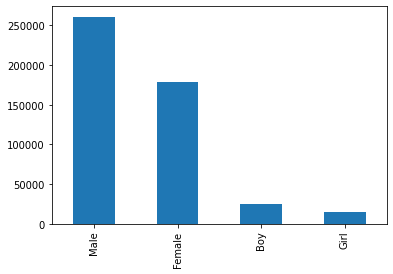

In [33]:
# Value count de Sex de forma gráfica
data['SEX'].value_counts().plot.bar()

### Cual es la distribución de la variable AGE?

Media, mediana y moda:

In [31]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Mean: 44.91226380480646
Median: 47.0
Mode: 0    0
Name: AGE, dtype: int64


Top 10 de las edades mas repetidas.

In [32]:
# top 10 age
data['AGE'].value_counts().head(10)

0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878
Name: AGE, dtype: int64

Box plots are commonly used for visualizing a distribution when bar plots or scatter plots are too overwhelming to understand.

<AxesSubplot:>

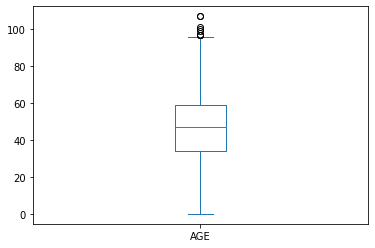

In [36]:
# boxplot para AGE
data['AGE'].plot.box()

En el grafico de arriba, la caja representa el **[Rango Intercuatilico (IQR, en inglés)](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico)** de los datos. 


El IQR representa la región donde cae el 50% de los datos. Por ejemplo del 25% al 75% del dataframe.
Todo dato que cae fuera de 1.5 veces el IQR es considerado, en general, una anomalía (OJO, NO SIEMPRE, DEPENDE DEL CONOCIMIENTO DE LOS DATOS POR PARTE DEL ANALISTA)

Los círculos se considerarían _outliers_

La librería _Seaborn_ ofrece visualizaciones mejores, de forma sencilla.


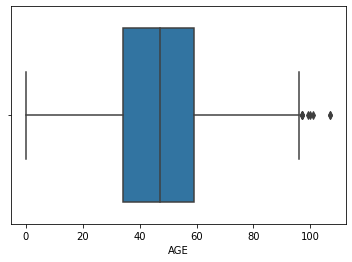

In [39]:
# sns.boxplot(data['AGE']) # Devuelve un warning, que se solucina definiendo x e y.
sns.boxplot(x=data['AGE']); # El ; evita la impresión de texto previo al gráfico.

### Preguntando y respondiendo con los datos

Una vez que hayamos realizado una pequeña exploración en los datos, ahora avancemos a realizarnos algunas preguntas para entender mejor el dataframe.

**Qué debería hacer si sólo quiero analizar los registros que pertenecen al distrito de Krishna?**

Deberí selecciononar un subconjunto de datos pertenencientes a Krishna. Pandas lo hace en dos sencillos pasos:

    1. Condición que se debe satisfacer: data['DISTRICT_NAME']=='Krishna'
    2. Insertamos la condición en el dataframe: [data['DISTRICT_NAME']=='Krishna']
      

In [40]:
# subset de datos que pertenecen al distrito de Krishna
data[data['DISTRICT_NAME']=='Krishna'].head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
30,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,Krishna,...,60000,Nims Hospitals,G,HYDERABAD,Hyderabad,2014-06-08,2014-01-09,NO,NaT,D
56,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,Krishna,...,25000,OZONE HOSPITALS,C,HYDERABAD,Ranga Reddy,2014-10-28,2014-06-11,NO,NaT,D
58,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,Krishna,...,135000,Karumuri Hospital,C,GUNTUR,Guntur,2014-04-11,2014-12-11,NO,NaT,D
97,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-08-04,NaT,YES,2015-03-05,P
111,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,Krishna,...,10000,Rims General Hospital,G,KADAPA,YSR Kadapa,2015-05-28,2015-01-06,NO,NaT,D


**Enfermedad/intervención con mayor prevalencia, por distrito**

Se puede obtener iterando a través de todos los distritos, y seleccionando el subset de datos para cada uno de ellos.


In [42]:
# Iteración
for i in data['DISTRICT_NAME'].unique():
    print("Distrito: {}\nEnfermedad/intervención y Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

Distrito: Srikakulam
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64
Distrito: Kurnool
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64
Distrito: Vizianagaram
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64
Distrito: Guntur
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64
Distrito: Vishakhapatnam
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64
Distrito: West Godavari
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64
Distrito: Krishna
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64
Distrito: East Godavari
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    6998
Name: SURG

**Average claim amount, district wise**

In [26]:
# Average claim amount for surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}\nAverage Claim Amount: ₹{}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

District: Srikakulam
Average Claim Amount: ₹25593.712618634367
District: Kurnool
Average Claim Amount: ₹28598.91853309593
District: Vizianagaram
Average Claim Amount: ₹25097.78006899492
District: Guntur
Average Claim Amount: ₹31048.73950729927
District: Vishakhapatnam
Average Claim Amount: ₹25977.94638304871
District: West Godavari
Average Claim Amount: ₹27936.70608610806
District: Krishna
Average Claim Amount: ₹31015.383233247547
District: East Godavari
Average Claim Amount: ₹26166.136719737173
District: Prakasam
Average Claim Amount: ₹28655.81036215859
District: Nellore
Average Claim Amount: ₹26105.122376744654
District: YSR Kadapa
Average Claim Amount: ₹27945.216899192998
District: Chittoor
Average Claim Amount: ₹25708.102690948628
District: Anantapur
Average Claim Amount: ₹27664.166978581827


The standard deviation doesn't seem to be quite high in this case. Guntur district leads the pack with ₹31048 while Vizianagaram comes last with ₹25097

**Statistics by surgery category**

We will be using the Pandas GroupBy construct to gather statistics by grouping data by the surgery category.  The groupby of Pandas works similar to the SQL command of the same name

In [27]:
# group by surgery category to get mean statistics
data.groupby('CATEGORY_NAME').mean()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
CATEGORY_NAME,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,220433.263365,51.764553,87052.165471,82487.123074
CARDIOLOGY,222494.427828,54.652048,33215.140211,26731.893660
COCHLEAR IMPLANT SURGERY,64429.337838,1.581081,520000.000000,516486.486486
CRITICAL CARE,225189.278328,51.014649,69927.226196,50185.150797
DERMATOLOGY,145752.231707,46.573171,28003.012195,21728.353659
ENDOCRINOLOGY,173188.782353,45.066667,18981.376471,14875.437255
ENT SURGERY,248911.441121,32.521940,15691.907198,14938.095612
GASTROENTEROLOGY,169310.423028,41.662383,37085.464601,23798.118922
GENERAL MEDICINE,116546.798682,35.330161,30347.573939,21840.991215


Cochlear Implant Surgery seems to be the costliest surgery, costing ₹520000 on average. Prostheses costs ₹1200, the cheapest. The youngest age group also happens to be for Cochlear Implant Surgery: 1.58 years, while Neurology has an average patient age of ~56.

**Most common surgery by age group**

To find the most common surgery by age group, let's round off the ages to the nearest ten's place. Make a copy of the dataframe for this operation as we would not want to tinker with the original dataframe.

In [28]:
# create a new memory copy of data to manipulate age 
dataround = data.copy()

We will use the Pandas round function to round off the Age. *-1* specifies that we round up one digit to the left of the decimal place

In [29]:
# round the age variable to 0 or 1 (nearest)
dataround['AGE'] = dataround['AGE'].round(-1)

visualizing the age groups using seaborn's countplot function

<AxesSubplot:xlabel='AGE', ylabel='count'>

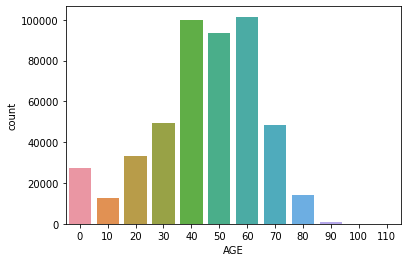

In [31]:
# a frequency plot for each age group
sns.countplot(x=dataround['AGE'])

**Most common surgery per age group**

In [32]:
# Most common surgery and count per age group
for i in sorted(dataround['AGE'].unique()):
    print("Age Group: {}\nMost Common Surgery and Count: {}".format(i,data[data['AGE']==i]['CATEGORY_NAME'].value_counts().head(1)))

Age Group: 0
Most Common Surgery and Count: PEDIATRICS    15096
Name: CATEGORY_NAME, dtype: int64
Age Group: 10
Most Common Surgery and Count: POLY TRAUMA    390
Name: CATEGORY_NAME, dtype: int64
Age Group: 20
Most Common Surgery and Count: POLY TRAUMA    729
Name: CATEGORY_NAME, dtype: int64
Age Group: 30
Most Common Surgery and Count: POLY TRAUMA    1125
Name: CATEGORY_NAME, dtype: int64
Age Group: 40
Most Common Surgery and Count: MEDICAL ONCOLOGY    2425
Name: CATEGORY_NAME, dtype: int64
Age Group: 50
Most Common Surgery and Count: MEDICAL ONCOLOGY    3171
Name: CATEGORY_NAME, dtype: int64
Age Group: 60
Most Common Surgery and Count: MEDICAL ONCOLOGY    2447
Name: CATEGORY_NAME, dtype: int64
Age Group: 70
Most Common Surgery and Count: POLY TRAUMA    1845
Name: CATEGORY_NAME, dtype: int64
Age Group: 80
Most Common Surgery and Count: POLY TRAUMA    584
Name: CATEGORY_NAME, dtype: int64
Age Group: 90
Most Common Surgery and Count: POLY TRAUMA    67
Name: CATEGORY_NAME, dtype: int64
A

## Practise Exercises

Feeling adventerous? Fork this notebook and solve the following challenges to get some practise!

**Value counts of districts**

**Average claim amount for male patients**

**Most common hospital names for treatment**

**Most common age groups  by district** (hint: use dataround)

**Add your own questions here!**

## The End

You've reached the end of the notebook. Congratulations!

I really hope you learnt something and enjoyed going through this notebook. If yes, please upvote and share the notebook!

Feedback? Corrections? Applause? Please comment below! 

This is my first public educative kernel. I hope my performance improves over epochs!


### Anomalías
Fuente: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

#### Con función (no se si no es demasiado complejo)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed=1)

# Creamos set random de datos
data = np.random.randn(50000) * 20 + 20

20.013530816925808
20.07576979467771


[80.61714224744061,
 99.17205408075927,
 86.4215751234073,
 -41.0752876085261,
 -43.06714900382097,
 -40.32063970418597,
 88.65326863591119,
 -41.28282712210201,
 94.80497807409178,
 82.70094680175814,
 84.76686393504752,
 -45.06068469953237,
 82.64059456281011,
 80.25509136474466,
 -43.81232693648161,
 -45.21230191553079,
 88.08604551497943,
 82.369591815651,
 85.9708104656157,
 82.97968050439259,
 -45.8971681339703,
 -41.11266480828613,
 100.53698089094755,
 -44.38264211247683,
 82.23783662033449,
 92.26554014166295,
 87.96231313004853,
 91.21746641411097,
 -53.128801985095905,
 -45.641575926212354,
 91.21225295344836,
 -43.46923274683489,
 82.13498657145581,
 82.90737927394908,
 -46.216851244091984,
 -41.9565310384887,
 -45.6065519410858,
 80.5243698860871,
 -43.30420249353775,
 -42.25263324372853,
 81.59215546151304,
 103.36235355910189,
 96.68762041821407,
 -40.586879558462776,
 -48.71851620008829,
 -45.18412137279293,
 81.54158108441533,
 84.5587224070789,
 -40.7688517191754,
 -4

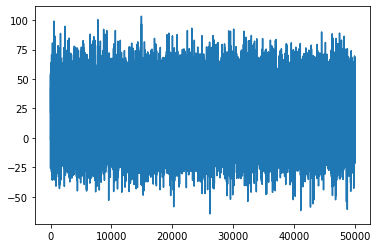

In [87]:
# Función para detectar outliers en un dataset unidimensional
def find_anomalies(data):
    #Definimos lista para acumular anomalias
    anomalies = []
    # Definimos limites +- 3 desvios
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    print(random_data_std)
    print(random_data_mean)
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
#     plt.plot (data)
#     plt.fill_between(range(6),lower_limit,upper_limit,alpha=.1)
    sns.lineplot(data=data)
    # Generamos ouliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

### Graficamente (más sencillo)
#### Intervalos de confianza

<AxesSubplot:xlabel='AGE', ylabel='CLAIM_AMOUNT'>

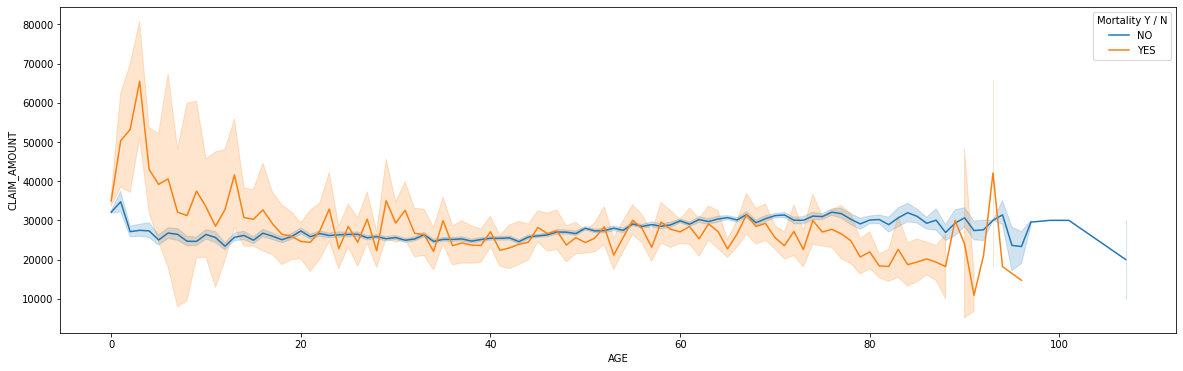

In [119]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x="AGE", y="CLAIM_AMOUNT", ci=95, hue="Mortality Y / N")

In [50]:
# Reducimos el DF para trabajar con mayor velocidad
data_graph = data.loc[data['SURGERY_DATE']>'2017-11-1']
data_graph = data_graph.copy()


In [51]:
data_graph.columns

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

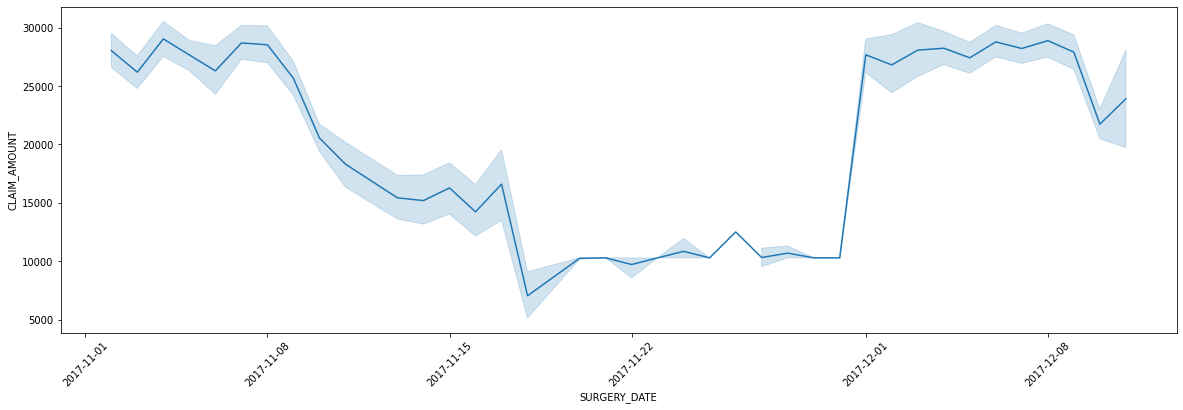

In [52]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=data_graph, x="SURGERY_DATE", y="CLAIM_AMOUNT")
plt.xticks(rotation=45); # el ; oculta el texto previo al gráfico. El mismo resultado se logra con plt.show()

In [53]:
data_graph.sort_values(by='SURGERY_DATE', ascending=False)
data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'] - 3*data_graph['CLAIM_AMOUNT']
data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'] + 3*data_graph['CLAIM_AMOUNT']
# data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

In [54]:
# data_graph['CLAIM_AMOUNT_RM_OK'] = 
data_graph.loc[data_graph['SURGERY_DATE']=='2017-11-01']

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CLAIM_AMOUNT_min,CLAIM_AMOUNT_max,CLAIM_AMOUNT_RM


In [55]:
data_graph.tail()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CLAIM_AMOUNT_min,CLAIM_AMOUNT_max,CLAIM_AMOUNT_RM
479683,22,Female,BC,S4,GYNAECOLOGY AND OBSTETRICS SURGERY,S4.2.2,Laparoscopic Cystectomy,Kalayakagollu,Butchireddipalem,Nellore,...,NELLORE,Nellore,2017-11-15,19/11/2017 00:00:00,NO,NaT,D,-49820,99640,10888.4
479684,60,Male,BC,S12,MEDICAL ONCOLOGY,S12.16.2.2,Chemotherapy for Non Hodgkin Lymphoma with R ...,Rajupalem,Kothapatnam,Prakasam,...,GUNTUR,Guntur,2017-11-17,18/11/2017 00:00:00,NO,NaT,D,-91820,183640,17826.4
479685,38,Male,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Yeturu,Chejerla,Nellore,...,NELLORE,Nellore,2017-11-16,18/11/2017 00:00:00,NO,NaT,D,-60000,120000,22398.4
479686,59,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Ganapavaram,Ganapavaram,West Godavari,...,GUNTUR,Guntur,2017-11-16,18/11/2017 00:00:00,NO,NaT,D,-46040,92080,25502.4
479687,63,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Savarigudem,Gannavaram,Krishna,...,GUNTUR,Guntur,2017-11-16,18/11/2017 00:00:00,NO,NaT,D,-46040,92080,29372.0


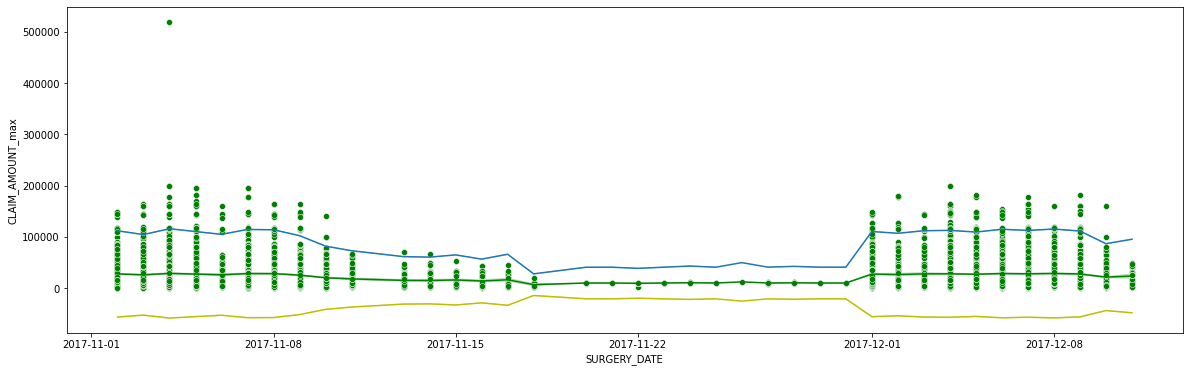

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

# ax.axes.set_title("Date and Claim Amount",fontsize=20)
# ax.set_xlabel("Date",fontsize=15)
# ax.set_ylabel("Claim Amount",fontsize=15)
# ax.tick_params(labelsize=5)
# plt.xticks(rotation=45)

plt.show()

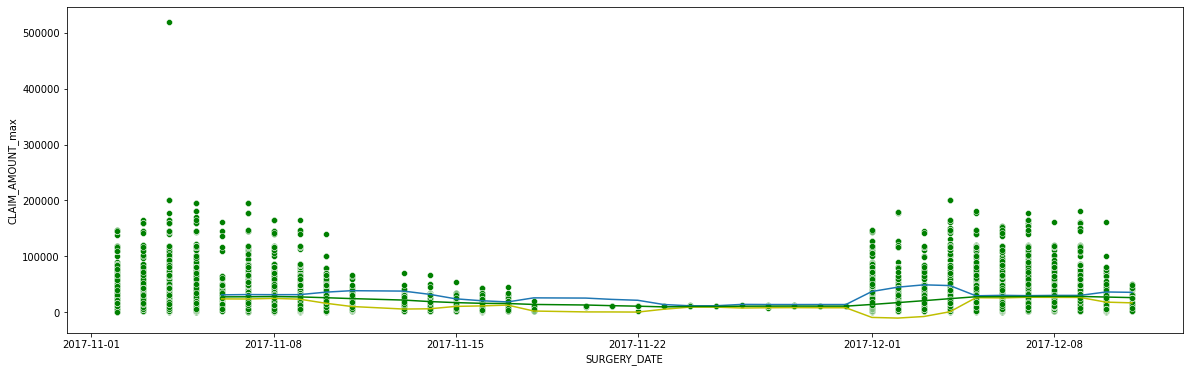

In [57]:
# Agrupamos los datos por fecha, con el promedio del CLAIM_AMOUNT
graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

# Calculamos el la media movil para el CLAIM_AMOUNT y -+ 3 desvíos
graph.sort_values(by='SURGERY_DATE', ascending=False)
graph['CLAIM_AMOUNT_min'] = graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_max'] = graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_RM'] = graph['CLAIM_AMOUNT'].rolling(5).mean()

fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

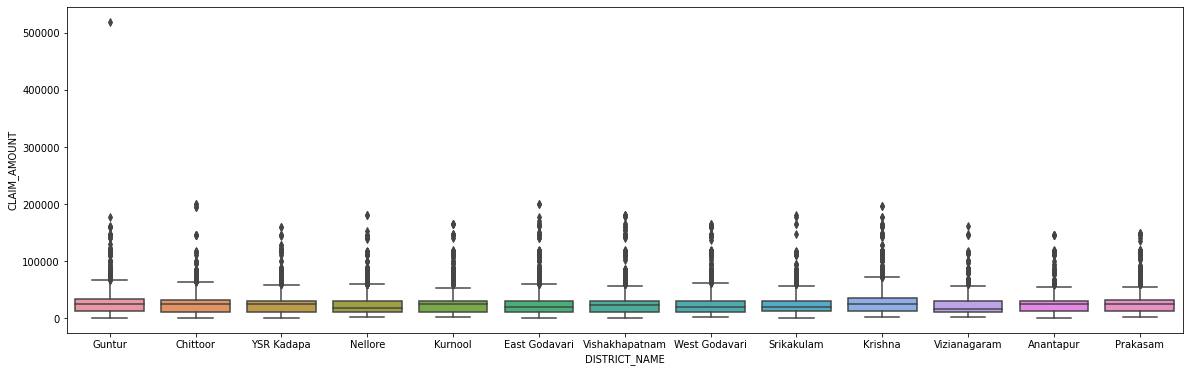

In [58]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(x=data_graph['DISTRICT_NAME'], y=data_graph['CLAIM_AMOUNT']);


#### Eliminar outliers

- Computamos el Z-score para la columna seleccionada, relativo a la media y al STD de esa columna
- Tomamos el valor absoluto del Z-score.

Si queremos calcular para todas las variables
- df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  
_all(axis=1)_  garantiza qeu para cada fila, todas las columnas satisfacen la restricciónensures that for each row, all column satisfy the constraint.


In [47]:
from scipy import stats
import numpy as np
# graph_graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

data_graph = data_graph[(np.abs(stats.zscore(data_graph['CLAIM_AMOUNT'])) < 3)]

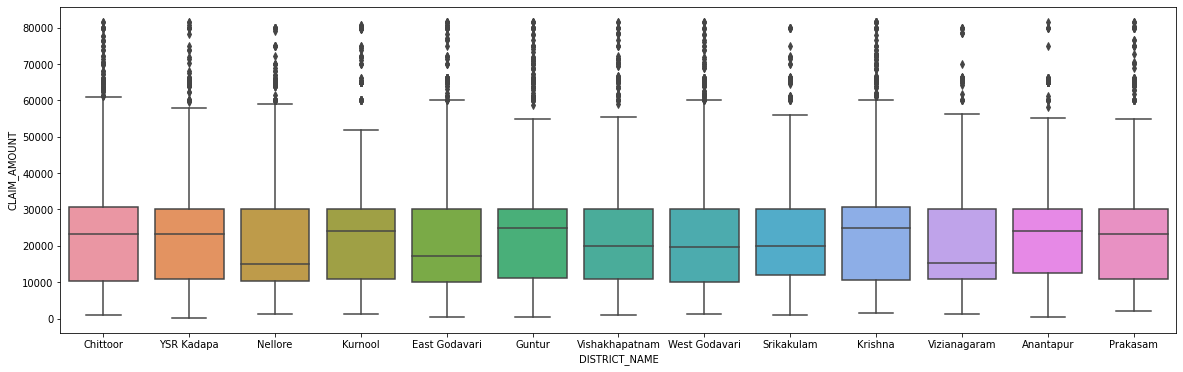

In [48]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(x=data_graph['DISTRICT_NAME'], y=data_graph['CLAIM_AMOUNT']);

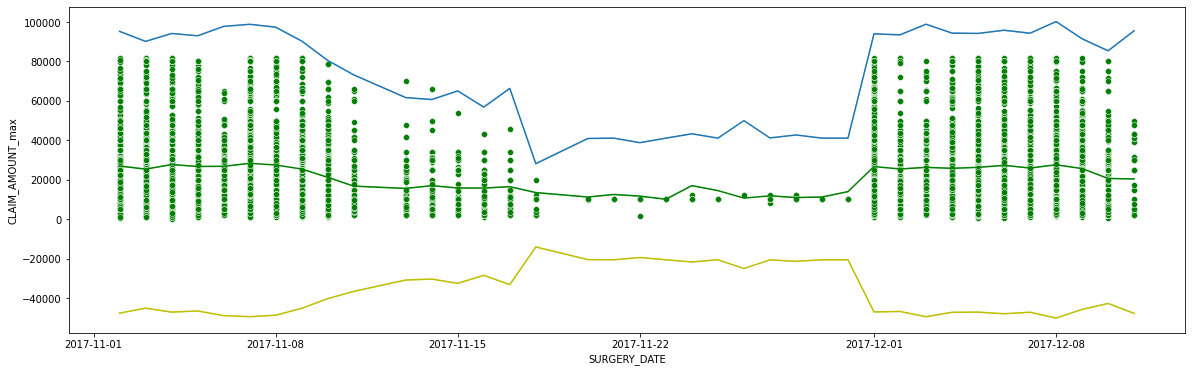

In [49]:
# Graficamos las series sin los valores que exceden el z-score
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=data_graph, 
             color='g',
             ci=False)

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');